In [1]:
from IPython.core.display import display_html
from urllib.request import urlopen

cssurl = 'http://j.mp/1DnuN9M'
display_html(urlopen(cssurl).read(), raw=True)

### Problema
Dado el sistema:

$$
\dot{x} = - 3 x(t) + x(t - 1) + x(t - 2)
$$

Simular el sistema con las siguientes condiciones iniciales $\varphi$:

1. $\varphi(t) = 1 \quad t \in [-2, 0]$
2. $\varphi(t) = \sin(t) \quad t \in [-2, 0]$
3. $\varphi(t) = \begin{cases} 1 & t = 0 \\ 0 & t \ne 0 \end{cases} \quad t \in [-2, 0]$

In [2]:
def ddeint(funcion, φ=lambda ts: [1 for t in ts], t_inicial=0, t_final=10,
           iteraciones=100, retardos=[0]):
    '''ddeint
    Esta función envuelve a odeint, de tal manera que sea capaz de evaluar ecuaciones
    diferenciales con retardos. Se necesita tener, al igual que con odeint, una función
    que se pueda evaluar en el estado y tiempos para integrar, pero además, debe tomar
    un tercer argumento que contiene los estados retardados, en el orden en que se dan
    en la llamada a ddeint.
    
    Ejemplo
    =======
    >>> # φ debe ser una función capaz de ser evaluada en un arreglo
    >>> phi = lambda ts: [1 for t in ts]
    >>> 
    >>> # La función a evaluar debe tomar el estado y el tiempo como argumentos con
    >>> # un tercero conteniendo los estados retardados
    >>> def f(s, t, p):
    ...     p1, p2 = p # p1 es el estado retardado con el valor del primer retardo
    ...     return -3*s + p1 + p2
    ...
    >>> t, y = ddeint(f, phi, retardos=[1, 2] = iteraciones=50)
    '''
    
    # Se importan funciones arange y append para trabajar con arreglos de numpy, asi
    # como odeint para encontrar la solución numérica de una EDO.
    from numpy import arange, append, array
    from scipy.integrate import odeint
    
    # Se define función auxiliar para acceder al arreglo de estado
    def tiempo_a_indice(tiempo):
        '''Tiempo a Indice
        Dado un tiempo como argumento de la función, lo convierte al indice del arreglo
        con el estado correspondiente a ese tiempo.
        '''
        indice = (retardo_maximo + tiempo)/δ
        return int(round(indice))
    
    # Se define al paso de integración como δ, el periodo total y retardo maximo
    δ = 1/iteraciones
    periodo = t_final - t_inicial
    retardo_maximo = max(retardos)
    
    # Se define arreglo con los tiempos para integracion y los tiempos de la condifcion
    # inicial
    tiempos = arange(t_inicial + δ, t_final + δ, δ)
    tiempos_condicion_inicial = arange(-retardo_maximo, δ, δ)
    
    # Se calculan los valores de la condicion inicial con los tiempos de la condicion
    # inicial y la funcion φ, y se inicializa el estado con estos valores
    valores_condicion_inicial = φ(tiempos_condicion_inicial)
    estados = list(valores_condicion_inicial)
    
    for t in tiempos:
        # Se calculan los estados retardados necesarios para el paso t de integracion
        estados_en_retardo = [estados[tiempo_a_indice(t - τ)] for τ in retardos]
        # Se crea una nueva funcion a integrar, evaluada en los estados retardados
        derivada = lambda s, t: funcion(s, t, estados_en_retardo)
        # Se resuelve numericamente un paso de la integral
        res = odeint(func=derivada, y0=estados[-1], t=[0, δ])
        # El resultado se pone al final del arreglo de estados
        estados = estados + [res[1]] # append(estados, res[1], axis=0)
        
    # Se convierte en array el estado para normalizar la salida y se devuelve solo el
    # estado despues de t=0
    return array(tiempos), array(estados)[tiempo_a_indice(0) + 1:]

In [3]:
from numpy import sin, array
def g(s, t, p):
    p1, p2 = p
    return -3*s + p1 + p2

tolerancia = 0.0001

phi0 = lambda ts: [1 for t in ts]
phi1 = sin
phi2 = lambda ts: [1 if abs(t)<tolerancia else 0 for t in ts]

In [4]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")

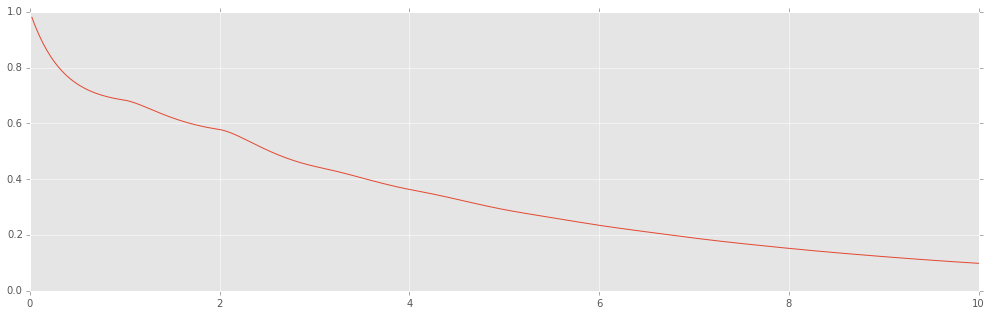

In [5]:
t, y = ddeint(g, phi0, retardos=[1,2], iteraciones=50)
fig = figure(figsize=(17, 5))
plot(t, y);

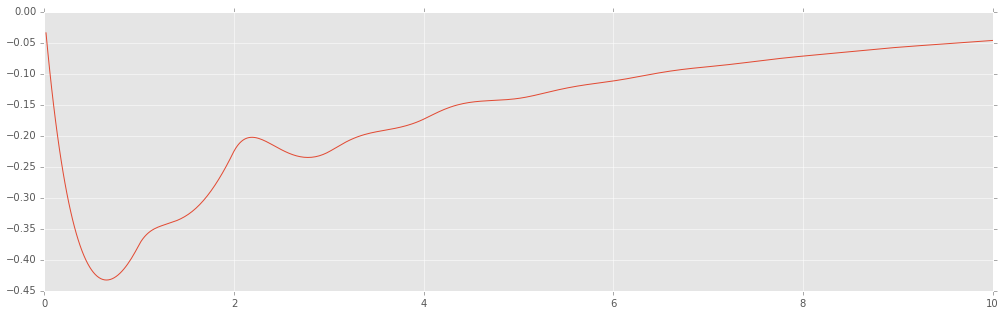

In [6]:
t, y = ddeint(g, phi1, retardos=[1,2], iteraciones=50)
fig = figure(figsize=(17, 5))
plot(t, y);

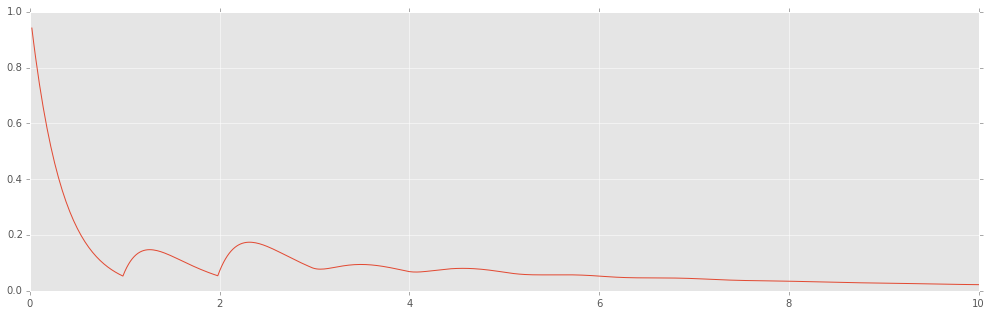

In [7]:
t, y = ddeint(g, phi2, retardos=[1,2], iteraciones=50)
fig = figure(figsize=(17, 5))
plot(t, y);

In [8]:
def f(s, t, p):
    from numpy import matrix
    
    A0 = matrix([[-2, 10], [0, -1]])
    A1 = matrix([[1, 5], [0, 0.5]])
    
    ṡ = A0*(matrix(s).T) + A1*(matrix(p).T)
    return (ṡ.T).tolist()[0]

phi = lambda ts: [[1, 1] for t in ts]

In [9]:
t, y = ddeint(f, phi, retardos=[1], iteraciones=50)

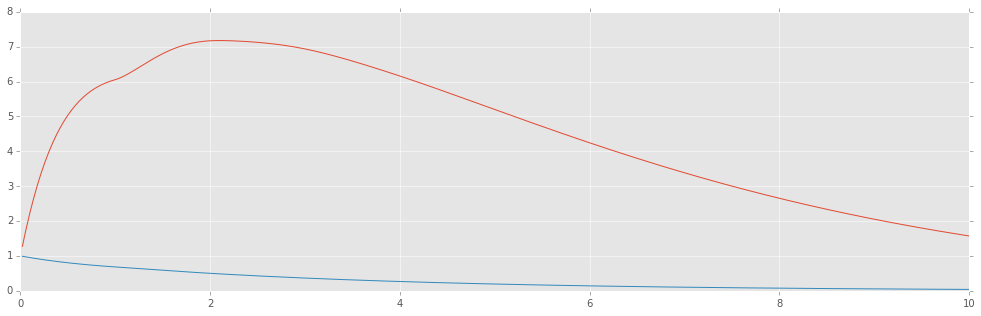

In [10]:
fig = figure(figsize=(17, 5))
plot(t, y);